# <center> Procesamiento de imágenes con Python
    

## Temario a desarrollar:
*	**Imágenes digitales: tipos (binarias, monocromáticas y a color)**
*	Histograma. Mejora de la imagen: contraste
*	Filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Aplicaciones 



    
# **CLASE 2**  Imágenes de archivos, librerías:

Hay varias librerías para el manejo de imágenes en Python, algunas tareas son compartidas aunque en general cada librería tiene su especialidad.
Las librerías que utilizaremos serán:

**PILOW**

**OpenCV**


La librería histórica es la **PIL (Python Image Library)**. Esta tiene un submódulo Image que antes era independiente, por eso es necesario indicarlo. Python no importa automáticamente los submódulos.
Actualmente la librería es la Pillow, pero se maneja igual.

**from PIL import Image**

o

**import PIL.Image**


- La librería PIL (PILLOW es una nueva versión más "friendly") permite cargar la imagen en memoria. Para manipular numéricamente los valores de intensidad es necesario convertirla en array con la librería numpy. 
- La librería OpenCV lleva la imagen a memoria directamente como matriz. Su tipo es ndarray.



## 2.1 Librería PIL o PILLOW: submódulo Image
**Verificamos la versión instalada:**

In [2]:
#PIL Python Image Library
import PIL
print(PIL.__version__) #verificamos la versión instalada

8.1.1


In [4]:
from PIL import Image  #solo importaremos Image de PIL

#Funciones: Image.open() #Carga la imagen (de archivo) en memoria
I=Image.open('./imagenes/mamushka.jpg') 
#Siempre para abrir una imagen de archivo, tenemos que estar ubicados en la carpeta donde tenemos 
#la imagen o bien conocer el Path completo de su ubicación 

print("El tamaño de la imagen es",I.size)#imprime tamaño
print("El modo de la imagen es", I.mode) #indica si es en color, o gris
print("El tipo de imagen es",I.format) #Si es png, pgm, jpg, etc.

I.show() #muestra la imagen original abriendo otra pantalla/ventana. Función propia de PIL

El tamaño de la imagen es (314, 161)
El modo de la imagen es RGB
El tipo de imagen es JPEG


**Pasamos a Monocroma (grises), modo L**

ver: https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes

modo L (monocroma) y modo RGB 

In [5]:
#continuación: 
Igris=I.convert('L') #Convierte la imagen en gris. En este ejemplo se la guarda en otra variable

print ("\nEl tamaño de la imagen en gris es ",Igris.size,"\nEl modo de la imagen en gris es ",Igris.mode,
       "\nEl formato de la imagen en gris es", Igris.format, ' sólo está en memoria') 

Igris.show() #muestra la imagen gris
#ver ventanas emergentes


El tamaño de la imagen en gris es  (314, 161) 
El modo de la imagen en gris es  L 
El formato de la imagen en gris es None  sólo está en memoria


### Guardamos la imagen a Memoria

In [ ]:
Igris.save('./imagenes/mamushkagris.png') #Graba la imagen creada. Función propia de PIL

### Correr Kernel-Restart and Clear Output para verificar que se grabó la imagen (observar la carpeta)

In [2]:
#Correr Kernel-Restart and Clear Output para verificar que se grabó la imagen (observar la carpeta)
from PIL import Image
Ig=Image.open('./imagenes/mamushkagris.png') #Traemos a memoria la imagen grabada
print("El tamaño es ",Ig.size,". El modo es ",Ig.mode,". El formato es", Ig.format)
Ig.show()


El tamaño es  (512, 512) . El modo es  L . El formato es PNG


**Como se dijo para poder manipular numéricamente los valores de intensidad es necesario usar la librería numpy. Para eso se debe convertir la imagen en un array.**

**Abrimos con Image de PIL, pasamos a numpy y graficamos con imshow de matplotlib.pyplot


las dimensiones del arreglo son  (161, 314, 3) es RGB


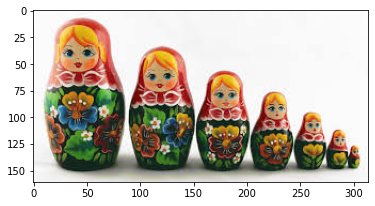

In [8]:
#from PIL import Image
import numpy as np #me permite convertir imagen a array y manipular numéricamente las intensidades
from matplotlib.pyplot import imshow #solo importamos imshow

I=Image.open('./imagenes/mamushka.jpg')
array_3D=np.array(I)
print('las dimensiones del arreglo son ', array_3D.shape, 'es RGB')
imshow(array_3D) #para graficar convierte I en array, imshow (función del matplotlib) 
#imshow muestra en la misma página. Si no muestra la imagen, correrlo nuevamente

In [9]:
#Al transformar la imagen en array con numpy se puede fijar el tipo de dato (opcional)
I_array=np.array(I,dtype=np.float32) # np.array por defecto hace una copia en este caso en I_array


#La imagen tiene "atributos" size, mode y format
print("Para la imagen el tamaño es ",I.size,", el modo es ",I.mode," y el formato es", I.format)

print("Para el array, size da la cantidad de píxeles: ",I_array.size," y shape da las dimensiones:",
      I_array.shape)

print("Tipo de datos del array: ", I_array.dtype)

#Se puede llevar nuevamente el array a imagen y grabarla
I_nueva=Image.fromarray(I_array.astype(np.uint8)) #y se la cambia de tipo de dato a uint8 (usual en imágenes)
I_nueva.save('./imagenes/prueba.jpg')

Para la imagen el tamaño es  (314, 161) , el modo es  RGB  y el formato es JPEG
Para el array, size da la cantidad de píxeles:  151662  y shape da las dimensiones: (161, 314, 3)
Tipo de datos del array:  float32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Cuidado con la pérdida de datos por la compresión jpg, ver tamaño de "prueba.jpg" y de "mamushka.jpg" 
máxima diferencia:  116.0


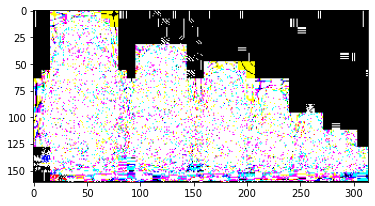

In [16]:
I_nueva2=Image.open('./imagenes/prueba.jpg')
I_nueva2_array=np.array(I_nueva2,dtype=np.float32)
imshow(abs(I_nueva2_array-I_array))
print('Cuidado con la pérdida de datos por la compresión jpg, ver tamaño de "prueba.jpg" y de "mamushka.jpg" ')
print('máxima diferencia: ',abs(I_nueva2_array-I_array).max())

**Para visualizar múltiples imágenes convertidas en array usamos imshow de matplotlib.pyplot**

**Si hemos limpiado la memoria, volvemos a importar las librerías y módulos**

(161, 314, 3) uint8


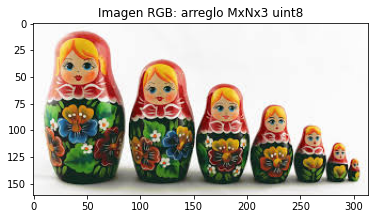

In [18]:
from PIL import Image
import numpy as np

I=Image.open('./imagenes/mamushka.jpg')
#I_array_3D=np.array(I,dtype=np.float32)
I_array_3D=np.array(I)
print(I_array_3D.shape, I_array_3D.dtype)
import matplotlib.pyplot as plt
#En este caso importamos matplotlib.pyplot con el alias plt
#para mostrar la imagen se usará plt.imshow()
plt.imshow(I_array_3D)
plt.title('Imagen RGB: arreglo MxNx3 uint8')
plt.show()

**Separamos cada componente**

dimensiones de la componente roja (monocroma) = (161, 314)


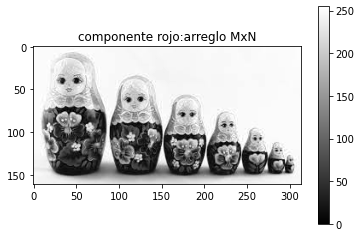

dimensiones de la componente verde (monocroma) = (161, 314)


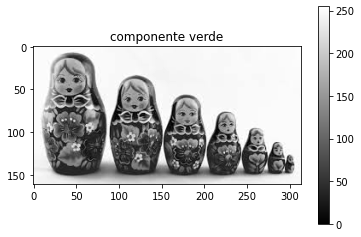

dimensiones de la componente azul (monocroma) = (161, 314)


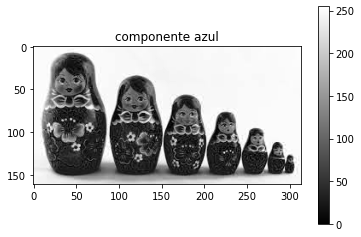

In [19]:
rojo2D=I_array_3D[:,:,0]
print("dimensiones de la componente roja (monocroma) =" , rojo2D.shape)
plt.imshow(rojo2D, cmap='gray')
plt.title('componente rojo:arreglo MxN')
plt.colorbar()
plt.show()

verde2D=I_array_3D[:,:,1]
print("dimensiones de la componente verde (monocroma) =" , verde2D.shape)
plt.imshow(verde2D, cmap='gray')
plt.title('componente verde')
plt.colorbar()
plt.show()

azul2D=I_array_3D[:,:,2]
print("dimensiones de la componente azul (monocroma) =" , azul2D.shape)
plt.imshow(azul2D, cmap='gray')
plt.title('componente azul')
plt.colorbar()
plt.show()


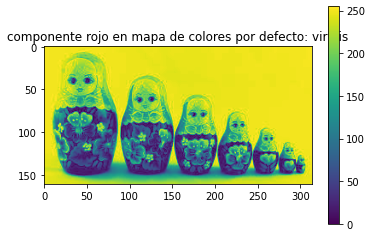

In [20]:
plt.imshow(rojo2D)
plt.title('componente rojo en mapa de colores por defecto: viridis')
plt.colorbar()
plt.show()

**Cuando sea necesario**

**activar: Kernel -> Restart & Clear Output**

**Considerando que hay que volver a importar las librerías necesarias**

## Librería OpenCV: cv2
La librería clásica por excelencia para el procesamiento de imágenes y visión por computadora es OpenCV (Computer Vision)

In [10]:
import cv2
cv2.__version__

'4.4.0'

### Cargar imagen en memoria con OpenCV

In [30]:
#Los canales de colores en OpenCV son BGR!Cuidado!
import cv2
Imagen=cv2.imread('./imagenes/rostro.jpeg')
#Igris = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
#I_rgb = cv2.cvtColor(Imagen, cv2.COLOR_BGR2RGB)
#I_rgb = Imagen[:, :, [2, 1, 0]]#También se puede convertir de esta forma
print("El tipo de la primer imagen es ",type(Imagen))
print("El tipo de cada píxel es ",type(Imagen[1,1,1]))
print("La dimensión de la imagen es ",Imagen.shape)

#A partir de shape podemos tomar variables con nombres más significativos
altura=Imagen.shape[0]
ancho=Imagen.shape[1]
canales=Imagen.shape[2]

print("La altura es",altura,".El ancho es ",ancho,".Los canales de color son ",canales)

Imagen2=cv2.imread('./imagenes/prueba.jpg')
print("\nEl tipo de la segunda imagen es ",type(Imagen2))
print("El tipo de cada píxel es ",type(Imagen2[1,1,1]))
print("La dimensión de la imagen es ",Imagen2.shape)

El tipo de la primer imagen es  <class 'numpy.ndarray'>
El tipo de cada píxel es  <class 'numpy.uint8'>
La dimensión de la imagen es  (275, 183, 3)
La altura es 275 .El ancho es  183 .Los canales de color son  3

El tipo de la segunda imagen es  <class 'numpy.ndarray'>
El tipo de cada píxel es  <class 'numpy.uint8'>
La dimensión de la imagen es  (161, 314, 3)


### Graficar ambas imágenes:
**Luego de correr el siguiente bloque, VER Ventana emergente, NO DEBE CERRARSE LA VENTANA EMERGENTE, ya que en ese caso no responde al pulsado posterior y no continúa la ejecución. pulse una tecla sobre ella para ver la imagen siguiente, pulse tecla nuevamente sobre la imagen para cerrar la visualización**

In [31]:
cv2.imshow('Pulse tecla para cambiar de imagen',Imagen)
cv2.waitKey(0) #espera pulsado tecla
#No debe cerrarse la ventana ya que en ese caso no responde al pulsado posterior
#y no continúa la ejecución
cv2.destroyAllWindows() 
cv2.imshow('Pulse tecla otra vez para cerrar',Imagen2)
cv2.waitKey(0) #espera pulsado tecla
cv2.destroyAllWindows() 